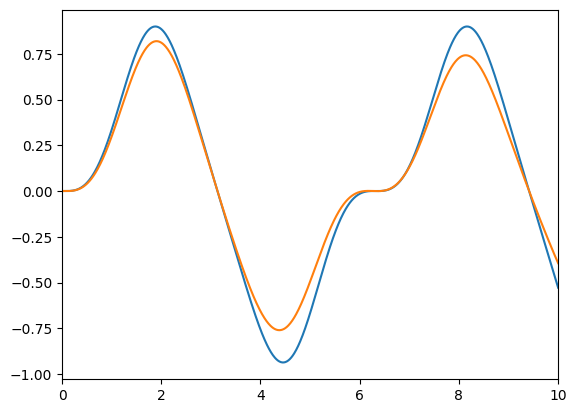

In [2]:
import json
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
from weigps import WeiNoF, WeiGPS


omega = 1
t = 1
psi = 1.5
A = 1
dt = 0.01

H0 = np.array([[1, 0],[0,1]])
N1 = np.array([[0,1],[1,0]]) #V
Iden = np.array([[1,0],[0,1]])

N = 5

HF = np.zeros([2*(2*N+1),2*(2*N+1)],dtype='complex128')

for i in range(-N,N+1):
    # print(i)
    for j in range(2):
        for k in range(2):
            HF[(i+N)*2+j,(i+N)*2+k] = H0[j,k] + i*omega*Iden[j,k]

# print(HF)


for i in range(-N,N):
    for j in range(2):
        for k in range(2):
            HF[(i+N)*2+j,(i+N+1)*2+k] = A*N1[j,k]*np.exp(-1j*psi)/2 
            HF[(i+N+1)*2+j,(i+N)*2+k] = A*N1[j,k]*np.exp(1j*psi)/2 

def RK4(H0,N1, t, wavefun,dt):
    
    V12 = A* np.cos(omega*t + psi)

    wave_01 = -1j*np.matmul(H0+N1*V12,wavefun) 

    V12 = A* np.cos(omega*(t+dt/2.0) + psi)

    wave_02 = -1j*np.matmul(H0+N1*V12,wavefun+wave_01*dt/2.0) 

    V12 = A* np.cos(omega*(t+dt/2.0) + psi)

    wave_03 = -1j*np.matmul(H0+N1*V12,wavefun+wave_02*dt/2.0) 

    V12 = A* np.cos(omega*(t+dt) + psi)

    wave_04 = -1j*np.matmul(H0+N1*V12,wavefun+wave_03*dt) 


    wavefun = wavefun + dt*(wave_01 + 2.0*wave_02 + 2.0*wave_03 + wave_04)/6.0

    return wavefun

def RK4_HF(HF,t, wavefun,dt):
    
    wave_01 = -1j*np.matmul(HF,wavefun) 

    wave_02 = -1j*np.matmul(HF,wavefun+wave_01*dt/2.0) 

    wave_03 = -1j*np.matmul(HF,wavefun+wave_02*dt/2.0) 

    wave_04 = -1j*np.matmul(HF,wavefun+wave_03*dt) 


    wavefun = wavefun + dt*(wave_01 + 2.0*wave_02 + 2.0*wave_03 + wave_04)/6.0

    return wavefun


# wavefun_0 = np.array([0,1])
# wavefun_F_0 = np.zeros([2*(2*N+1)])

wavefun = np.array([1,0])
wavefun_F = np.zeros([2*(2*N+1)])
for i in range(-N,N+1):
    for j in range(2):
        wavefun_F[(i+N)*2+j]= wavefun[j]

# print(wavefun_F)

n_step = 10000
t_list = np.linspace(0,dt*n_step,n_step)
y_list = np.linspace(0,dt*n_step,n_step)
z_list = np.zeros(n_step)

for it in range(n_step):
    t = it*dt
    wavefun = RK4(H0,N1,t,wavefun,dt)
    wavefun_F = RK4_HF(HF,t,wavefun_F,dt)
    flag=1 # select to see which state 
    y_list[it] = wavefun[flag] 
    for i in range(-N, N+1):
        z_list[it] += wavefun_F[(i+N)*2+flag]*np.exp(1j*i*omega*t)

plt.plot(t_list,y_list)
plt.plot(t_list,z_list/(2*N+1))
plt.xlim(0,10)
plt.show()

# print(HF)



In [3]:
light_size = 1
molecule_size = 1
disorder = 0 # std_dev
frequency_molecule = list(WeiGPS.get_distribution(mean=1,num_samples=molecule_size,disorder=disorder,random_seed=int(10),cut_off=[-7,7]))
frequency_light = list(WeiGPS.get_distribution(mean=np.mean(frequency_molecule),num_samples=light_size,disorder=0))
hbar = 1
dt = 0.005
tf = 100
Floquet_level = 5

phase = list((1.5)*np.ones(molecule_size))

phase_random = None
Omega = 1

data = {
    "light_size": light_size, # the number of photon modes
    "molecule_size": molecule_size, # the number of molecule vibrational modes
    "hbar": hbar, # default 1

    "frequency_molecule": frequency_molecule, # vibrational frequency
    "frequency_light": frequency_light, # [frequency_light]
    "V_coupling_strength":1, #1, 1.5, 2
    
    "dt": dt, # correlation function dt
    "tf": tf, # correlation function tf
    "Floquet_level": Floquet_level, # Floquet level
    "disorder": disorder, # std_dev

    "gamma":0.1, # another gaussian width (std_dev)

    "phase_random": phase_random, # random SEED, label random phase; if not random phase no need set None;
    "phase":phase, # phase: cos(\Omega*t+phase)
    "phase_up": 1, # range of 1/32 * [-np.pi, np.pi]
    "phase_dw": 32, # range of 1/32 * [-np.pi, np.pi]
    "Omega": Omega, # w: cos(\Omega*t+phase)  0 0.1 0.5
    
    "w_left_lim": -20, # spectrum left end
    "w_right_lim": 20, # spectrum right end
    "w_length_lim":1000, # spectrum the number of w
}

# 指定要保存 JSON 数据的文件路径
json_file_path = "data3.json"

# 使用 json.dump() 将数据写入 JSON 文件
with open(json_file_path, "w") as json_file:
    json.dump(data, json_file)


In [4]:
NoF = WeiNoF(json_file_path)

V_coupling_strength: 1


In [5]:
GPS = WeiGPS(json_file_path)

V_coupling_strength: 1


In [6]:
row, col, data = GPS.sparse_matrix()

In [7]:
g_matrix = GPS.dense((data,(row,col),(2*(2*5+1),2*(2*5+1))))

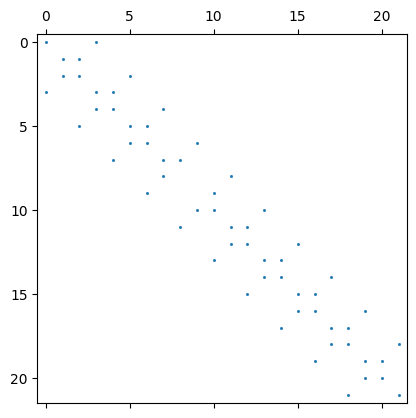

In [8]:
plt.spy(g_matrix,markersize=1)

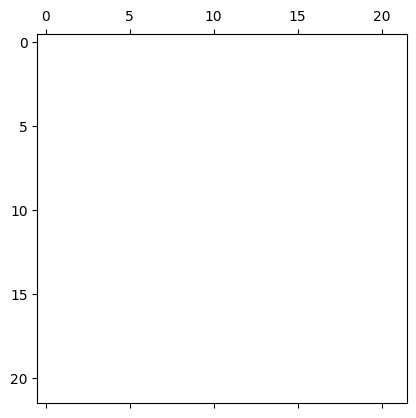

In [10]:
plt.spy(g_matrix - HF, markersize=1)

In [11]:
TIME_GPS, observable_GPS = GPS.run_dynamics(bench=True)

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [12]:
TIME_NoF, observable_NoF = NoF.run_dynamics(bench=True)

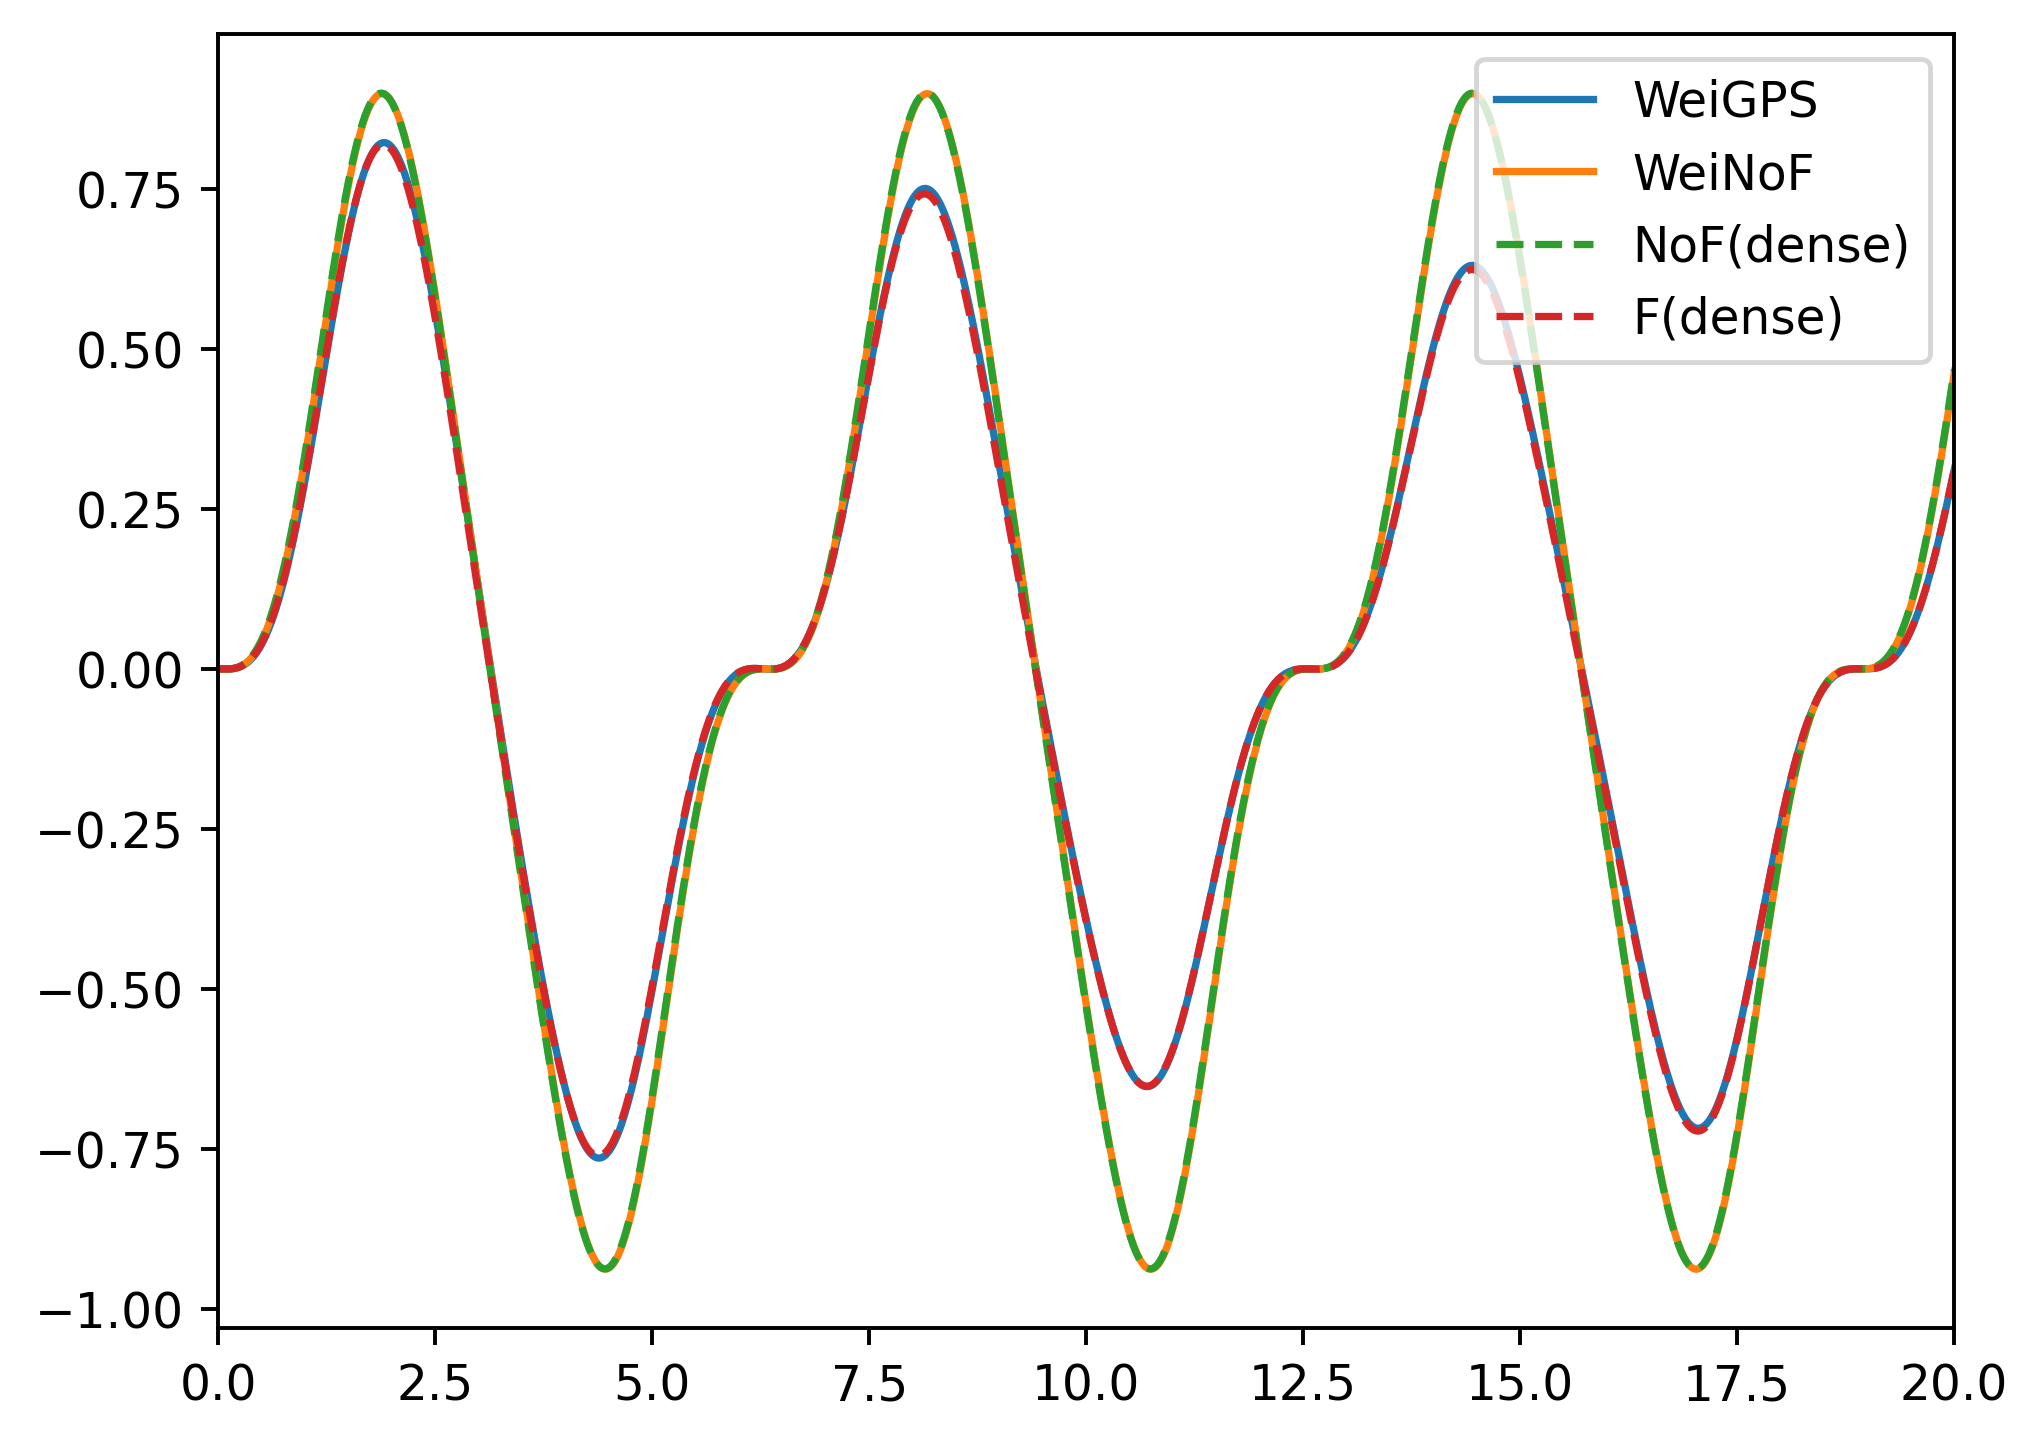

In [19]:
plt.figure(dpi=350)
plt.plot(TIME_GPS, observable_GPS, label="WeiGPS")
plt.plot(TIME_NoF, observable_NoF, label="WeiNoF")
plt.plot(t_list,y_list,'--', label="NoF(dense)")
plt.plot(t_list,z_list/(2*N+1),'--', label="F(dense)")
plt.xlim(0, 20)
plt.legend()